In [1]:
import requests
res = requests.get('https://tw.stock.yahoo.com/_td-stock/api/resource/FinanceChartService.ApacLibraCharts;autoRefresh=1659431773759;symbols=%5B%222330.TW%22%5D;type=tick?bkt=&device=desktop&ecma=modern&feature=ecmaModern%2CuseNewQuoteTabColor&intl=tw&lang=zh-Hant-TW&partner=none&prid=4s0c7shhehqp0&region=TW&site=finance&tz=Asia%2FTaipei&ver=1.2.1432&returnMeta=true')
res

<Response [200]>

In [3]:
jd =res.json()['data']

In [5]:
close = jd[0]['chart']['indicators']['quote'][0]['close']

In [7]:
timestamp = jd[0]['chart']['timestamp']

In [10]:
import pandas
df = pandas.DataFrame({'timestamp':timestamp, 'close':close})

In [11]:
df.head()

,timestamp,close
0,1659402000,NaN
1,1659402060,494.0
2,1659402120,494.5
3,1659402180,495.5
4,1659402240,495.5


In [13]:
df['dt'] = pandas.to_datetime(df['timestamp'] + 3600 * 8, unit = 's')

<AxesSubplot:xlabel='dt'>

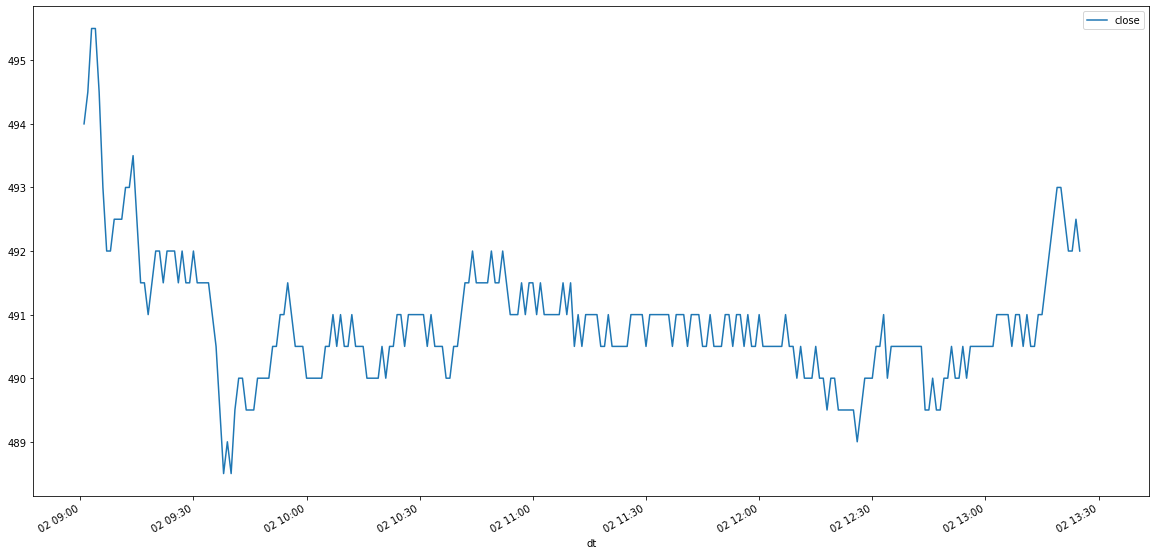

In [15]:
df.plot('dt', 'close', figsize = (20, 10))